In [ ]:
%pip install qiskit
%pip install matplotlib
%pip install qiskit-aer
%pip install pylatexenc


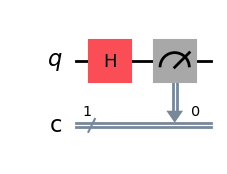

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create your first quantum circuit
qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
qc.h(0)  # Apply Hadamard gate
qc.measure(0, 0)  # Measure qubit 0 into classical bit 0

# Draw the circuit
qc.draw('mpl')  # Use 'mpl' for a better visualization


In [2]:
# Create a circuit to experiment with gates
qc = QuantumCircuit(1, 1)

# X gate (NOT gate)
qc.x(0)

# H gate (Hadamard)
qc.h(0)

# Measure
qc.measure(0, 0)

# Visualize
qc.draw()


┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

{'0': 512, '1': 512}


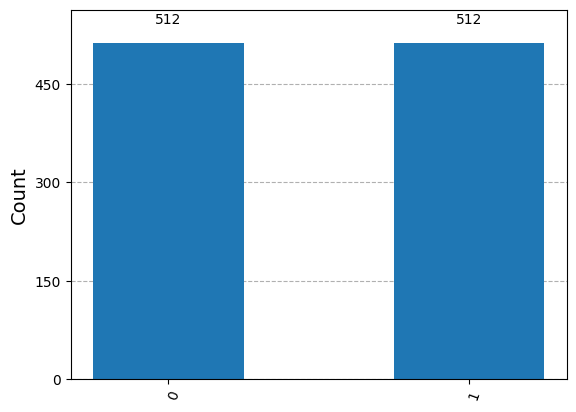

In [9]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate
qc.x(0)  # Apply X gate (NOT gate)
qc.measure(0, 0)  # Measure the qubit

# Select a quantum simulator backend
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator (optimizes for backend)
qc_transpiled = transpile(qc, simulator)

# Run the transpiled circuit
job = simulator.run(qc_transpiled, shots=1024)

# Get results
results = job.result()
counts = results.get_counts()

# Print results and show histogram
print(counts)
plot_histogram(counts)



In [10]:
def generate_random_bit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.measure(0, 0)
    
    simulator = Aer.get_backend('qasm_simulator')

    qc_transpiled = transpile(qc, simulator)

    job = simulator.run(qc_transpiled, shots=1024)

    # Get results
    results = job.result()
    counts = results.get_counts()
    return int(list(counts.keys())[0])
   
# Generate 10 random bits
random_bits = [generate_random_bit() for _ in range(10)]
print(random_bits)

[1, 0, 1, 0, 0, 0, 1, 1, 1, 1]


In [59]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def generate_random_number(num_qubits):
    # Create a quantum circuit with the specified number of qubits and classical bits
    qc = QuantumCircuit(num_qubits, num_qubits)
    
    # Apply Hadamard gate to all qubits to create superposition
    for qubit in range(num_qubits):
        qc.h(qubit)
        # qc.t(qubit) # Apply T gate to introduce a phase shift
        # qc.cx(qubit, (qubit + 1) % num_qubits)  # Apply CNOT gate to entangle qubits


    # Measure all qubits
    qc.measure(range(num_qubits), range(num_qubits))
    

    # Select a quantum simulator backend
    simulator = Aer.get_backend('qasm_simulator')
    
    # Transpile the circuit for the simulator
    qc_transpiled = transpile(qc, simulator)
    
    # Run the transpiled circuit
    job = simulator.run(qc_transpiled, shots=1)  # Only 1 shot needed for a single random number
    
    # Get results
    results = job.result()
    counts = results.get_counts()
    
    # Extract the binary result and convert to decimal
    random_binary = list(counts.keys())[0]
    random_number = int(random_binary, 2)
    
    return random_number #,qc



# Generate a random number using 4 qubits
random_number = generate_random_number(4) #,qc
#qc.draw('mpl')
print(f"Random number: {random_number}")

Random number: 15


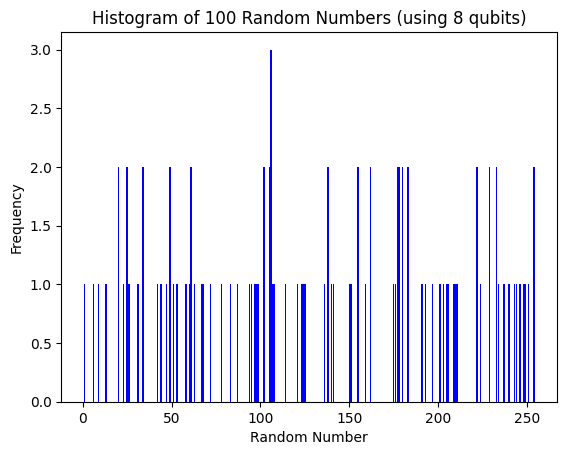

In [72]:
import matplotlib.pyplot as plt
from collections import Counter

# Generate multiple random numbers and store them
def generate_random_numbers(num_qubits, num_samples):
    random_numbers = []
    for _ in range(num_samples):
        random_numbers.append(generate_random_number(num_qubits))
    return random_numbers

# Generate 100 random numbers using 4 qubits
num_qubits = 8
num_samples = 100
random_numbers = generate_random_numbers(num_qubits, num_samples)

# Count occurrences of each random number
counts = Counter(random_numbers)

# Plot the histogram
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title(f'Histogram of {num_samples} Random Numbers (using {num_qubits} qubits)')
plt.show()

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Generate multiple random numbers and store them
def generate_random_numbers(num_qubits, num_samples):
    random_numbers = []
    for _ in range(num_samples):
        random_numbers.append(generate_random_number(num_qubits))
    return random_numbers

# Generate 100 random numbers using 4 qubits
num_qubits = 8
num_samples = 100
random_numbers = generate_random_numbers(num_qubits, num_samples)

# Calculate mean and standard deviation
mean = np.mean(random_numbers)
std_dev = np.std(random_numbers)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Count occurrences of each random number
counts = Counter(random_numbers)


Mean: 140.85
Standard Deviation: 74.77852298621578


Quantum RNG - Mean: 128.93, Std Dev: 76.97379489150838
Classical RNG - Mean: 134.93, Std Dev: 76.98847381264288


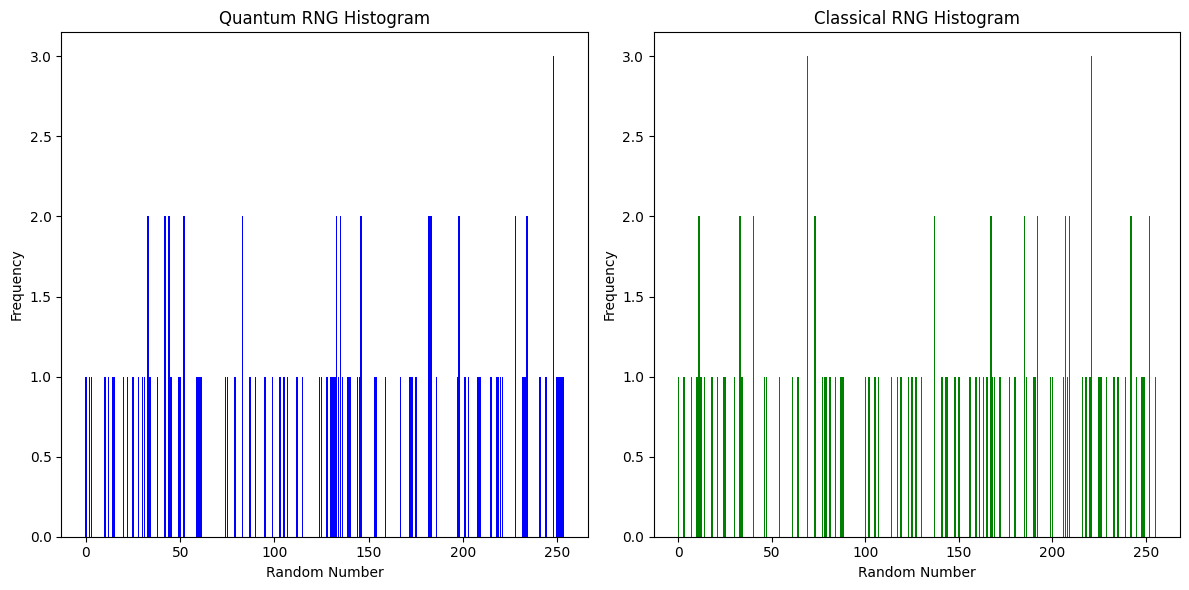

In [77]:

import random

# Generate random numbers using Python's random library
def generate_classical_random_numbers(num_samples, max_value):
    return [random.randint(0, max_value) for _ in range(num_samples)]

# Parameters
num_qubits = 8
num_samples = 100
max_value = (2 ** num_qubits) - 1  # Maximum value for the given number of qubits

# Generate random numbers using quantum and classical methods
quantum_random_numbers = generate_random_numbers(num_qubits, num_samples)
classical_random_numbers = generate_classical_random_numbers(num_samples, max_value)

# Calculate mean and standard deviation for both methods
quantum_mean = np.mean(quantum_random_numbers)
quantum_std_dev = np.std(quantum_random_numbers)

classical_mean = np.mean(classical_random_numbers)
classical_std_dev = np.std(classical_random_numbers)

print(f"Quantum RNG - Mean: {quantum_mean}, Std Dev: {quantum_std_dev}")
print(f"Classical RNG - Mean: {classical_mean}, Std Dev: {classical_std_dev}")

# Plot histograms for comparison
plt.figure(figsize=(12, 6))

# Quantum RNG histogram
plt.subplot(1, 2, 1)
quantum_counts = Counter(quantum_random_numbers)
plt.bar(quantum_counts.keys(), quantum_counts.values(), color='blue')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Quantum RNG Histogram')

# Classical RNG histogram
plt.subplot(1, 2, 2)
classical_counts = Counter(classical_random_numbers)
plt.bar(classical_counts.keys(), classical_counts.values(), color='green')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Classical RNG Histogram')

plt.tight_layout()
plt.show()